In [ ]:
%ls

sample_data/


In [ ]:
# setup kaggle and fetching dataset from kaggle.
! pip install -q kaggle
from google.colab import files
files.upload()

! mkdir ~/.kaggle 

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d l3llff/flowers

Saving kaggle.json to kaggle.json
 93% 212M/228M [00:02<00:00, 111MB/s] 
100% 228M/228M [00:02<00:00, 103MB/s]


In [ ]:
! unzip flowers.zip -d flowers

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/magnolia/2090666304_0ff8463c5f_c.jpg  
  inflating: flowers/flowers/magnolia/20914736071_ede33a230a_c.jpg  
  inflating: flowers/flowers/magnolia/2126107417_92101f8b5f_c.jpg  
  inflating: flowers/flowers/magnolia/21500695820_bc9f753d79_c.jpg  
  inflating: flowers/flowers/magnolia/21986337916_36d1c95e64_c.jpg  
  inflating: flowers/flowers/magnolia/2294580412_50846f9130_c.jpg  
  inflating: flowers/flowers/magnolia/2300805045_982fa1bdf2_c.jpg  
  inflating: flowers/flowers/magnolia/2306786428_99f92b0d9c_c.jpg  
  inflating: flowers/flowers/magnolia/2324281515_c0269d5963_c.jpg  
  inflating: flowers/flowers/magnolia/2325102200_1cb9d8cabc_c.jpg  
  inflating: flowers/flowers/magnolia/2325102996_5f1e3bf13a_c.jpg  
  inflating: flowers/flowers/magnolia/2325370643_f452e88ace_c.jpg  
  inflating: flowers/flowers/magnolia/2334886646_c4c8ee532e_c.jpg  
  inflating: flowers/flowers/magnolia/23422365843_3b4b928a4a_c

In [ ]:
%cd flowers

/content/flowers


In [ ]:
%ls

flowers/


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/flowers/flowers'

In [ ]:
img_ext = ['jpg', 'jpeg', 'png']
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_ext:
        print("Unsupported format. Removing Image")
        os.remove(image_path)
    except Exception as e:
      print("Error: ", e)


(256, 256, 3)


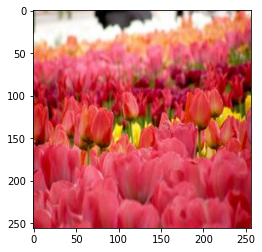

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    path = os.path.join(data_dir, image_class, image)
    # print(path)
    img = cv2.imread(path)
    print(img.shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    break
  break

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
# tf.keras.utils.image_dataset_from_directory??

Found 15740 files belonging to 16 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# 1 batch of 32 images. batch[0]: image arrays, batch[1]: labels.
batch = data_iterator.next()
len(batch)
batch[0].shape


(32, 256, 256, 3)

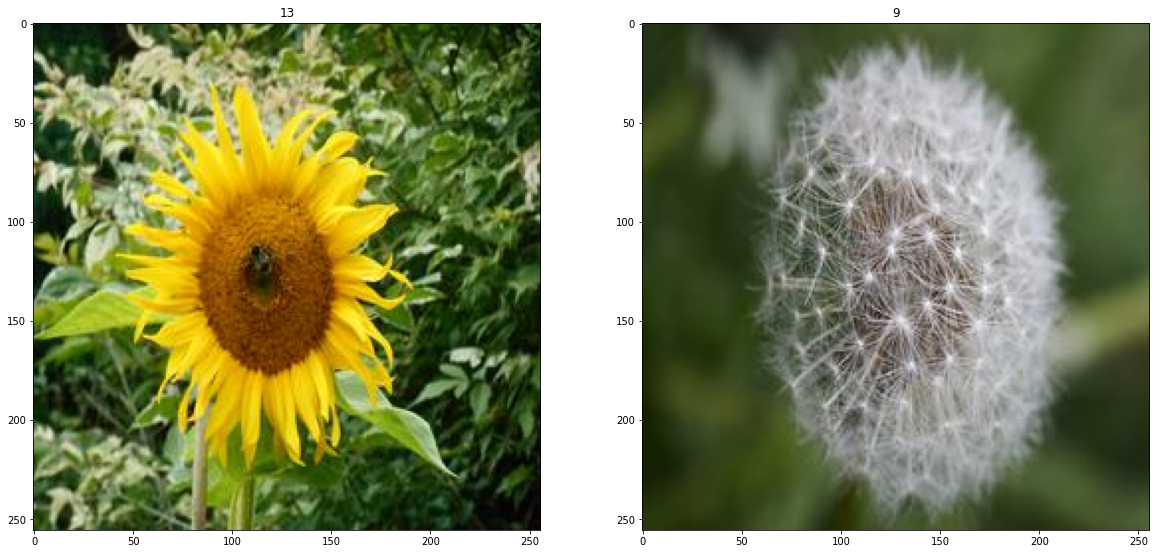

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
for idx, img in enumerate(batch[0][:2]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x, y: (x/255, y)) # x: images, y: labels

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
print(len(data)*32) # no of images.

train_size = int(len(data)*0.75)
val_size = int(len(data)*0.13)
test_size = int(len(data)*0.12)

print(train_size*32, val_size*32, test_size*32)

15744
11808 2016 1888


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())


model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), 2, activation='relu', kernel_regularizer='l2')) # l2 added
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2048,activation='relu', kernel_regularizer='l2')) # l2 added
model.add(Dropout(0.25)) # added
model.add(Dense(2048,activation='relu'))

model.add(Dense(16 ,activation='softmax'))


In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_258 (Conv2D)         (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_259 (Conv2D)         (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                     

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback, callback])

Epoch 1/100
369/369 [==============================] - 84s 214ms/step - loss: 5.5823 - sparse_categorical_accuracy: 0.2016 - val_loss: 2.5830 - val_sparse_categorical_accuracy: 0.2713
Epoch 2/100
369/369 [==============================] - 86s 232ms/step - loss: 2.2895 - sparse_categorical_accuracy: 0.2597 - val_loss: 1.9995 - val_sparse_categorical_accuracy: 0.3304
Epoch 3/100
369/369 [==============================] - 86s 232ms/step - loss: 2.1540 - sparse_categorical_accuracy: 0.2889 - val_loss: 2.0686 - val_sparse_categorical_accuracy: 0.2981
Epoch 4/100
369/369 [==============================] - 78s 212ms/step - loss: 2.1223 - sparse_categorical_accuracy: 0.3083 - val_loss: 2.2019 - val_sparse_categorical_accuracy: 0.3388
Epoch 5/100
369/369 [==============================] - 77s 209ms/step - loss: 2.0888 - sparse_categorical_accuracy: 0.3255 - val_loss: 1.9718 - val_sparse_categorical_accuracy: 0.3844
Epoch 6/100
369/369 [==============================] - 78s 210ms/step - loss: 2.

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
!ls

conv1  flowers	logs  model.h5	model_weights.h5


In [ ]:
import matplotlib.pyplot as plt

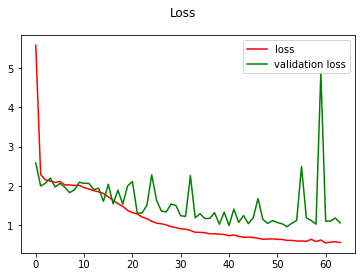

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='validation loss')
fig.suptitle("Loss")
plt.legend(loc='upper right')
plt.show()

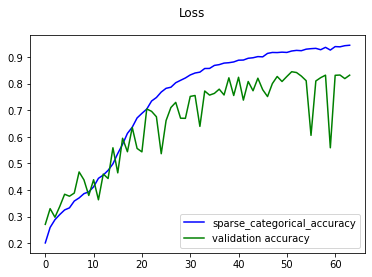

In [ ]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='blue', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='green', label='validation accuracy')
fig.suptitle("Loss")
plt.legend(loc='best')
plt.show()

In [ ]:
score = model.evaluate(test) 

59/59 [==============================] - 16s 55ms/step - loss: 1.1601 - sparse_categorical_accuracy: 0.8141


In [ ]:
acc = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 37ms/step


In [ ]:
print(acc.result().numpy())

0.8114407


In [ ]:
import cv2
import urllib
import skimage

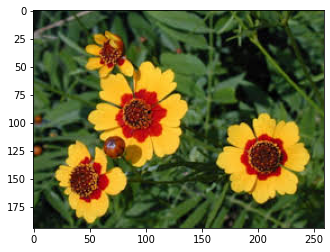

In [ ]:
path = "https://h2.commercev3.net/cdn.springhillnursery.com/images/800/83662A.jpg"
path2 = "https://static.toiimg.com/photo/msid-94477364/94477364.jpg"
path3 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlkC0wRpWAhS_29DENiGNVXiu1mEtEIdsXbA&usqp=CAU"
path4 = "https://media.istockphoto.com/id/96647190/photo/single-dandelion.jpg?s=612x612&w=0&k=20&c=ExfkwGFGhUiGLi3N1Xh_pMYhCq58QgJqQ4OoQWffG8o=" # outputs: sunflower
path5 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRR6uHZYJphqJUxd-jlQIk-V9PPXdLyjPNqw&usqp=CAU"

img = io.imread(path5)
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256, 256))

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


In [ ]:
print(np.argmax(yhat))

7
